In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
#data for assignment
training_data = np.loadtxt("homework_5_train.txt")
X_train = training_data[:,0:2] #selects columns 1 and 2, which are the x and y coords of the data
Y_train = training_data[:,2] #selections column 3, which is the 0 or 1 label of the data

test_data = np.loadtxt("homework_5_test.txt")
X_test = test_data[:,0:2]
Y_test = test_data[:,2]

### Problem 1

In [6]:
logreg_model_obj = LogisticRegression()
logreg_model_obj.fit(X_train, Y_train)

Y_hat = logreg_model_obj.predict(X_train)

p = sklearn.metrics.precision_score(Y_train, Y_hat)  #order of inputs for these functions is true, prediction
r = sklearn.metrics.recall_score(Y_train, Y_hat)

print("Training precision: ", p)
print("Training recall: ", r)

Training precision:  1.0
Training recall:  1.0


### Problem 2

In [7]:
Y_hat_test = logreg_model_obj.predict(X_test)  #notice I don't call fit again

p = sklearn.metrics.precision_score(Y_test, Y_hat_test)   #again, make sure you note the order of the inputs
r = sklearn.metrics.recall_score(Y_test, Y_hat_test)

print("Test precision: ", p)
print("Test recall: ", r)

Test precision:  0.8703703703703703
Test recall:  0.94


### Problem 3

In [10]:
train_mean = np.mean(X_train, axis=0)
train_var = np.var(X_train, axis=0)

test_mean = np.mean(X_test, axis=0)
test_var = np.var(X_test, axis=0)

print("Training data mean: ", train_mean)
print("Test data mean: ", test_mean)
print("\n")
print("Training data variance: ", train_var)
print("Test data variance: ", test_var)

Training data mean:  [ 1.06746459 -0.16255519]
Test data mean:  [ 1.31123737 -0.53876015]


Training data variance:  [4.50500375 3.99375224]
Test data variance:  [6.81330413 6.50673423]


### Bonus

In [18]:
#for plotting Prob 3 and bonus
#I'm breaking up the data like this so that the coordinates of class 1 in the list X_1
#and the coordinates of class 2 in the list X_2 are clear
X_1 = []
X_2 = []
for row in range(X_train.shape[0]):
    if Y_train[row] == 0:
        X_1.append(X_train[row,:])
    else:
        X_2.append(X_train[row,:])
X_1 = np.asarray(X_1)
X_2 = np.asarray(X_2)

#doing the same for the test data
X_1_test = []
X_2_test = []
for row in range(X_train.shape[0]):
    if Y_train[row] == 0:
        X_1_test.append(X_test[row,:])
    else:
        X_2_test.append(X_test[row,:])
X_1_test = np.asarray(X_1_test)
X_2_test = np.asarray(X_2_test)


In [21]:
#lay out the grid values for the decision boundary to evaluate
xx = np.linspace(-8, 8, 30)
yy = np.linspace(-8, 8, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T  #this is like meshgrid from matlab

#evaluate the decision boundary of the model object
Z = logreg_model_obj.decision_function(xy).reshape(XX.shape)

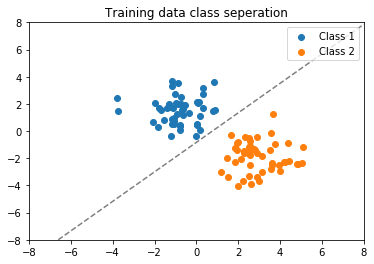

In [22]:
plt.title("Training data class seperation")
plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.scatter(X_2[:,0], X_2[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.legend()
plt.show()

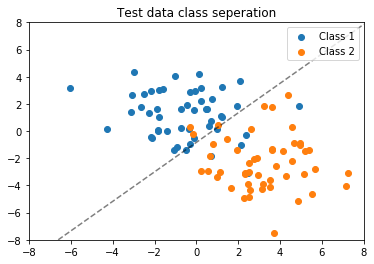

In [23]:
plt.title("Test data class seperation")
plt.scatter(X_1_test[:,0], X_1_test[:,1], label="Class 1")
plt.scatter(X_2_test[:,0], X_2_test[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.legend()
plt.show()